# Convolutional Neural Networks

Convolutional neural networks are popular in machine learning techniques involving image data. A typical network consists of several such convolutional layers, with the filters each subsequent layer capturing a more abstract feature.

Here, we will show the training history of few such networks on the age classification problem. These networks are a variation of the popular LeNet-5 network. Such a network consists of a few Convolutional layers, a fully-connected layer and a final layer corresponding to the classes. The following network was used to classify the images. (Figure generated using [NN-SVG](http://alexlenail.me/NN-SVG/LeNet.html) webtool. )



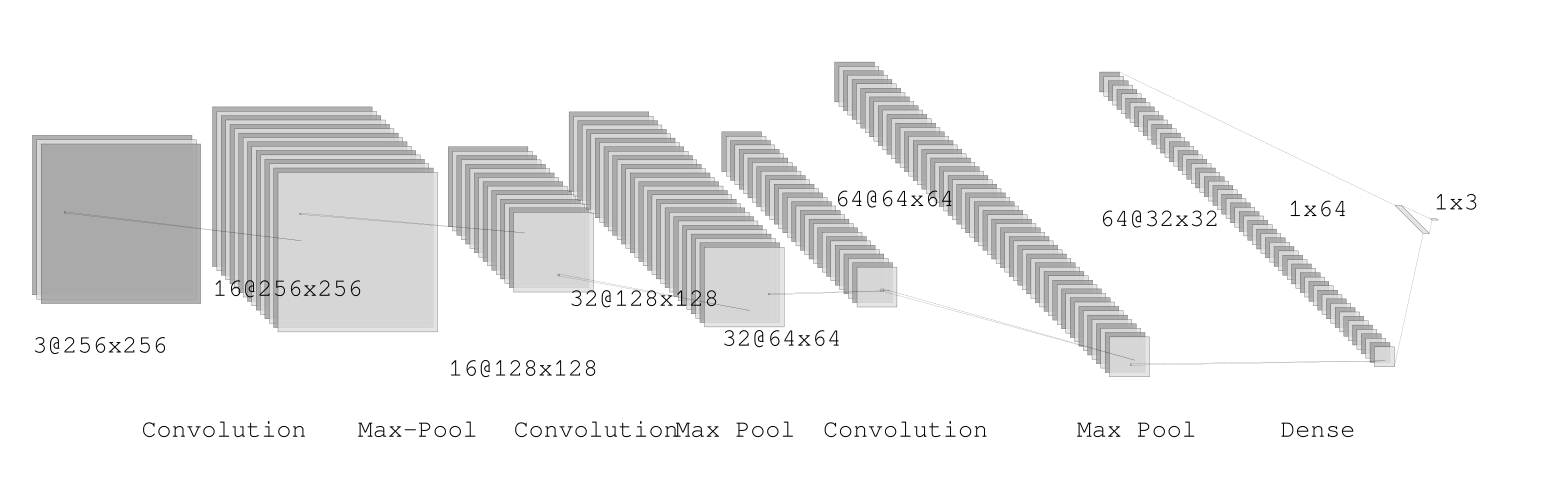

In [1]:
from IPython.display import Image
Image('lenet.png') 

All images are rescaled to (256 x 256 pixels) with 3 color channels. These images are three stages of Convolutional layers, each followed by a pooling layer to reduce the number of parameters. The output of these layers is flattened and fed into a fully connected "Dense" layer. The last layer consisting of three neurons classifies the systems using the one-hot encoding method. Before this layer a drop-out layer is implemented which prevents a certain percentage of nodes from updating. This helps in reducing over-fitting the model.

We use an image generator in keras which allows us to perform certain random transforms that will help the training process. Here, we allow the images to be flipped horizontally randomly.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rotation_range = 30,              
    rescale = 1./255,
    zoom_range = 0.0,
    horizontal_flip = True )

train_generator=train_datagen.flow_from_directory('../Faces/',target_size=(256,256),
        class_mode='categorical', batch_size=32,interpolation='bicubic')

valid_datagen=ImageDataGenerator(
    rotation_range = 30,
    rescale = 1./255,
    zoom_range = 0.0,
    horizontal_flip = True )

valid_generator=valid_datagen.flow_from_directory('../valid_Faces/',target_size=(256,256),
        class_mode='categorical', batch_size=32,interpolation='bicubic' )


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout , BatchNormalization

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(2,2),strides=(1,1),padding='same', input_shape=(256,256,3),data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid' ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))


/home/prasadb/miniconda3/envs/tf-graphViz/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/prasadb/miniconda3/envs/tf-graphViz/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/prasadb/miniconda3/envs/tf-graphViz/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/prasadb/miniconda3/

In [5]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      208       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        32832     
__________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("lenet_1.h5", monitor='val_acc', verbose=1,
        save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=300, verbose=1, mode='auto')

hist = model.fit(steps_per_epoch=10,x=train_generator,
        validation_data= valid_generator, validation_steps=10,epochs=1000,
        callbacks=[checkpoint,early], verbose=2)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tr_data=np.loadtxt('training_history.txt',delimiter=' ')

In [9]:
%matplotlib inline

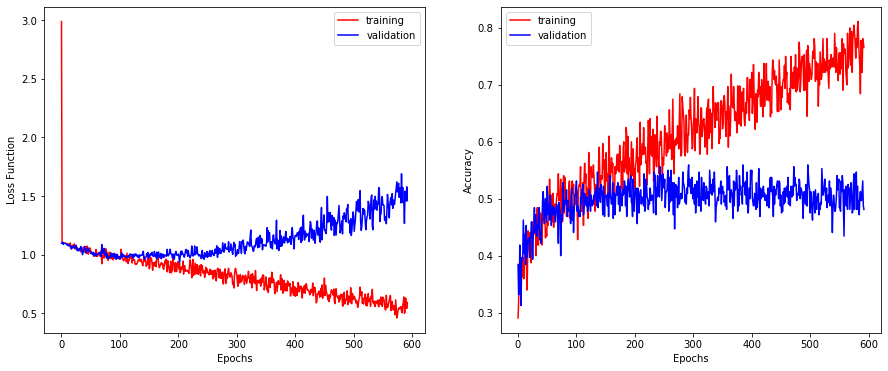

In [14]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 6)

ax[0].plot(tr_data[:,0],color='r',label='training')
ax[0].plot(tr_data[:,1],color='b',label='validation')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss Function')
ax[0].legend()

ax[1].plot(tr_data[:,2],color='r',label='training')
ax[1].plot(tr_data[:,3],color='b',label='validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [16]:
max(tr_data[:,3])

0.5594

The largest validation accuracy obtained by this model was 55.9% . That isn't great and there is a lot of room for improvement. A few similar models can be tried before hyperparameter tuning.

## Similar models

### Model 1

A similar model was tried with a twice the number of filters/kernels in the first convolutional layer.

In [17]:
m1_tr_data=np.loadtxt('model1_tr_history.txt',delimiter=' ')

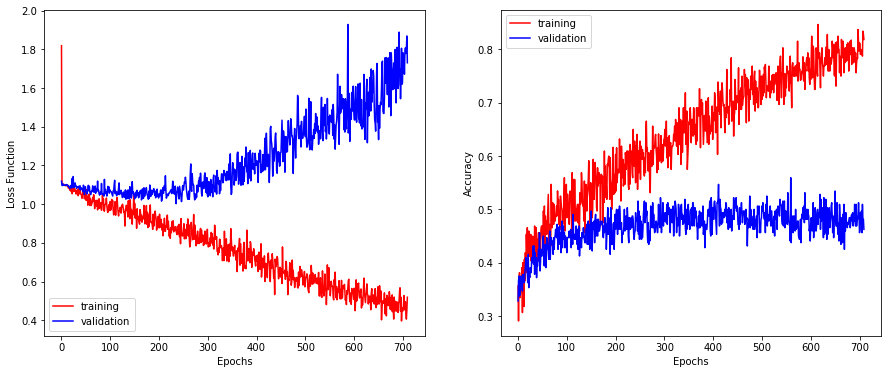

In [18]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 6)

ax[0].plot(m1_tr_data[:,0],color='r',label='training')
ax[0].plot(m1_tr_data[:,1],color='b',label='validation')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss Function')
ax[0].legend()

ax[1].plot(m1_tr_data[:,2],color='r',label='training')
ax[1].plot(m1_tr_data[:,3],color='b',label='validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

This model seems to start overfitting the training data pretty early-on compared to the previous model. The model did not show any improvement in the validation accuracy as well

### Model 2

We try another model where the filter size as well as the number of filters is increased. Filter size is increased from 2x2 to 3x3 and the number of filters is doubled from 16 to 32 in the first layer. This model does show an increase in the validation accuracy

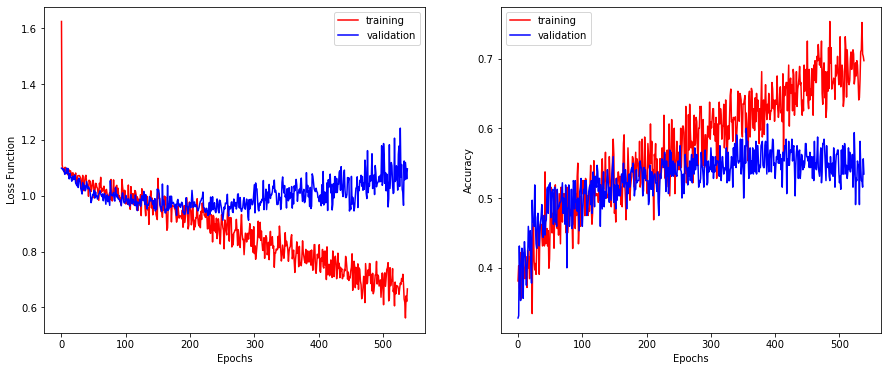

In [19]:
m2_tr_data=np.loadtxt('model2_tr_history.txt',delimiter=' ')
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 6)

ax[0].plot(m2_tr_data[:,0],color='r',label='training')
ax[0].plot(m2_tr_data[:,1],color='b',label='validation')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss Function')
ax[0].legend()

ax[1].plot(m2_tr_data[:,2],color='r',label='training')
ax[1].plot(m2_tr_data[:,3],color='b',label='validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [20]:
max(m2_tr_data[:,3])

0.6062

This model with a larger kernel at the input trains for more epochs before it starts over-fitting. It also produces a larger validation accuracy of 60.6%

## Further improvement

We noticed that increasing the filter size did have an effect on the learning rate. We could try to improve the learning rate by changing the filter size in the subsequent layers. The learning rate can be changed to check if it allows for a larger increase in the validation accuracy

The [winning model](http://chalearnlap.cvc.uab.es/media/results/None/cvl_ethz_age_fact_sheet.pdf) in the previous competition hosted by the same group implemented a deep VGG-16 model and used transfer learning to train the model on a much larger dataset. Such a technique can prevent the model from overfitting the small dataset available here.

Improvements can be made in the image preparation step itself. An off-the-shelf face-detection software was used to detect the face of the person in this image. Choosing the largest feature was an ad-hoc method to automate the process and crop out the face , since it was assumed that no other feature larger than the face would have features similar to a face. But a quick look at the data set will tell us that this method doesn't work for all the images, albeit being successful for most of the images.


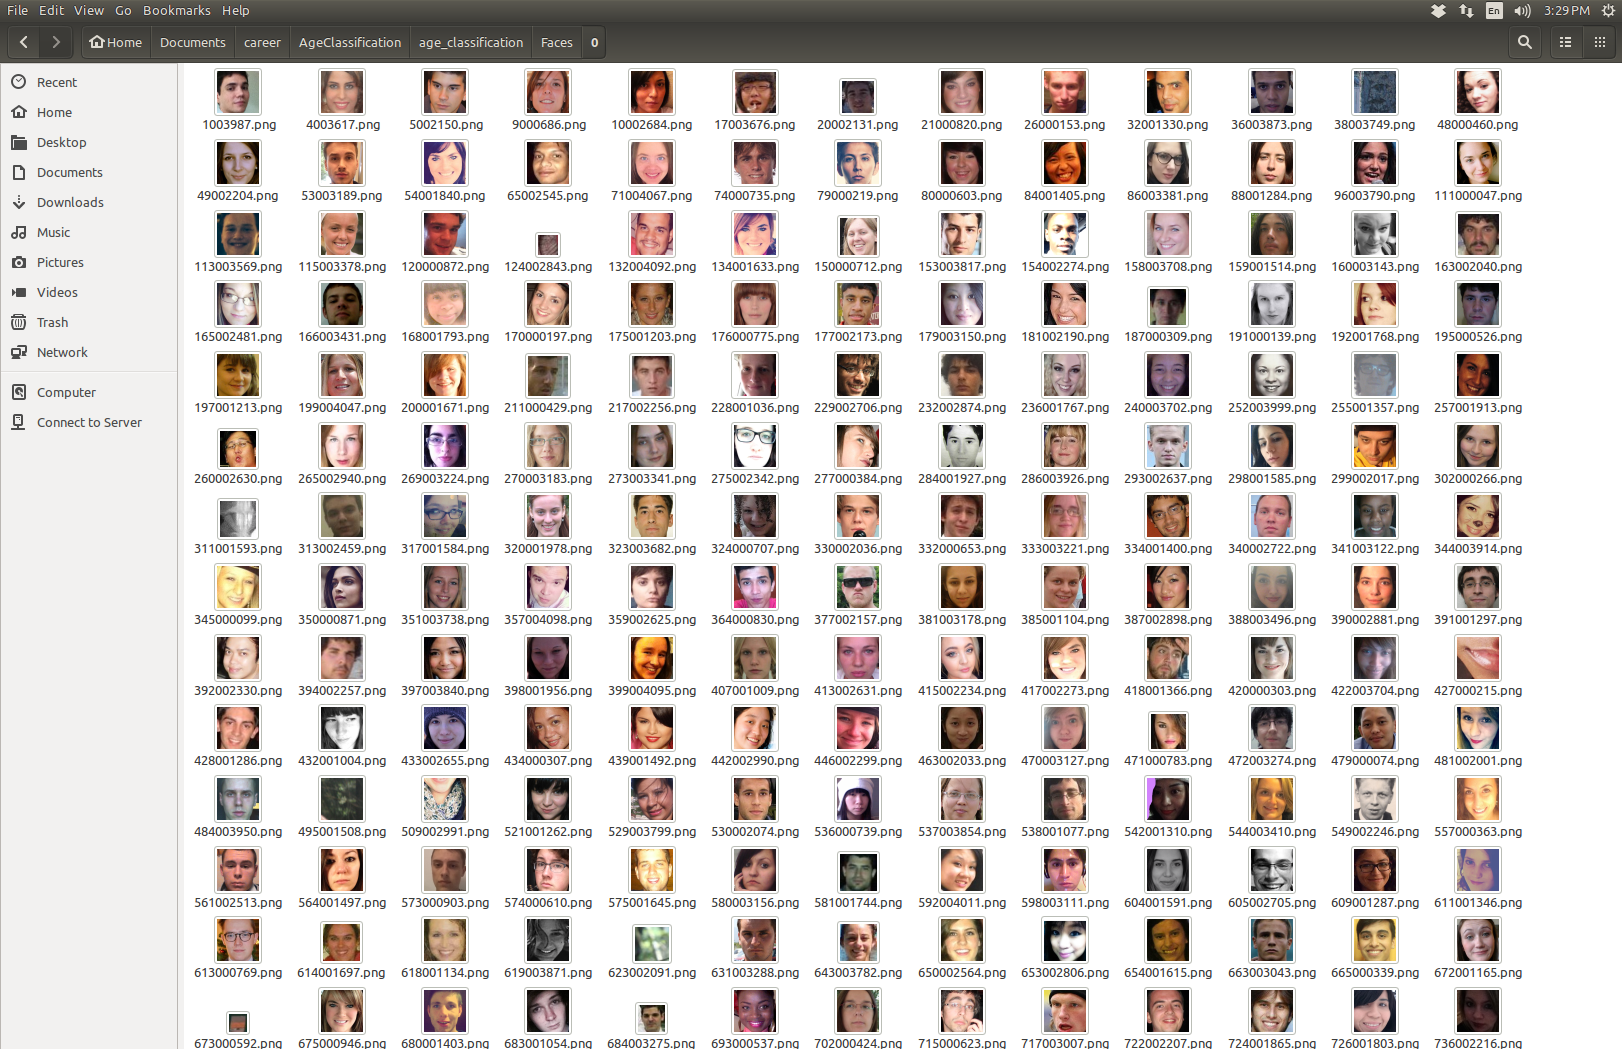

In [24]:
Image('ScreenShotFaces0.png')

As we can see above in a screenshot of one of the folders, most images are faces of people.

Here is an example where the face-detection algorithm detects a partial face

<img src="Faces/2/1912000176.png" alt="drawing" width="200"/>

<img src="train/000176.jpg" alt="drawing" width="200"/>

And an example where it does not detect the face of the person

<img src="Faces/0/1767001657.png" alt="drawing" width="200"/>

<img src="train/001657.jpg" alt="drawing" width="200"/>

